In [1]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(123)
inputs = torch.randn(1, 10)
print(inputs)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])


In [3]:
dropout = nn.Dropout(0.5)

dropout.train()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

dropout.eval()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

True
tensor([[-0.0000,  0.2407, -0.0000, -0.4808, -0.0000,  0.0000, -1.9447, -0.0000,
          0.6478, -0.2170]])
False
tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])


In [4]:
!git clone https://github.com/wikibook/pythonlibs.git

from pythonlibs.torch_lib1 import *

print(README)

Cloning into 'pythonlibs'...


Common Library for PyTorch
Author: M. Akaishi


In [5]:
from torchvision import datasets, transforms

transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1)),
])

transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

In [6]:
data_root = './data'

train_set1 = datasets.CIFAR10(root = data_root, train=True, download=True, transform=transform1)
test_set1 = datasets.CIFAR10(root = data_root, train=False, download=True, transform=transform1)

train_set2 = datasets.CIFAR10(root = data_root, train=True, download=True, transform=transform2)
test_set2 = datasets.CIFAR10(root = data_root, train=False, download=True, transform=transform2)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [7]:
image1, label1 = train_set1[0]
image2, label2 = train_set2[0]

print(image1.shape)
print(image2.shape)

torch.Size([3072])
torch.Size([3, 32, 32])


In [8]:
from torch.utils.data import DataLoader

batch_size = 100

train_loader1 = DataLoader(train_set1, batch_size=batch_size, shuffle=True)
test_loader1 = DataLoader(test_set1, batch_size=batch_size, shuffle=False)

train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)
test_loader2 = DataLoader(test_set2, batch_size=batch_size, shuffle=False)

In [9]:
for images1, labels1 in train_loader1:
    break

for images2, labels2 in train_loader2:
    break

print(images1.shape)
print(images2.shape)

torch.Size([100, 3072])
torch.Size([100, 3, 32, 32])


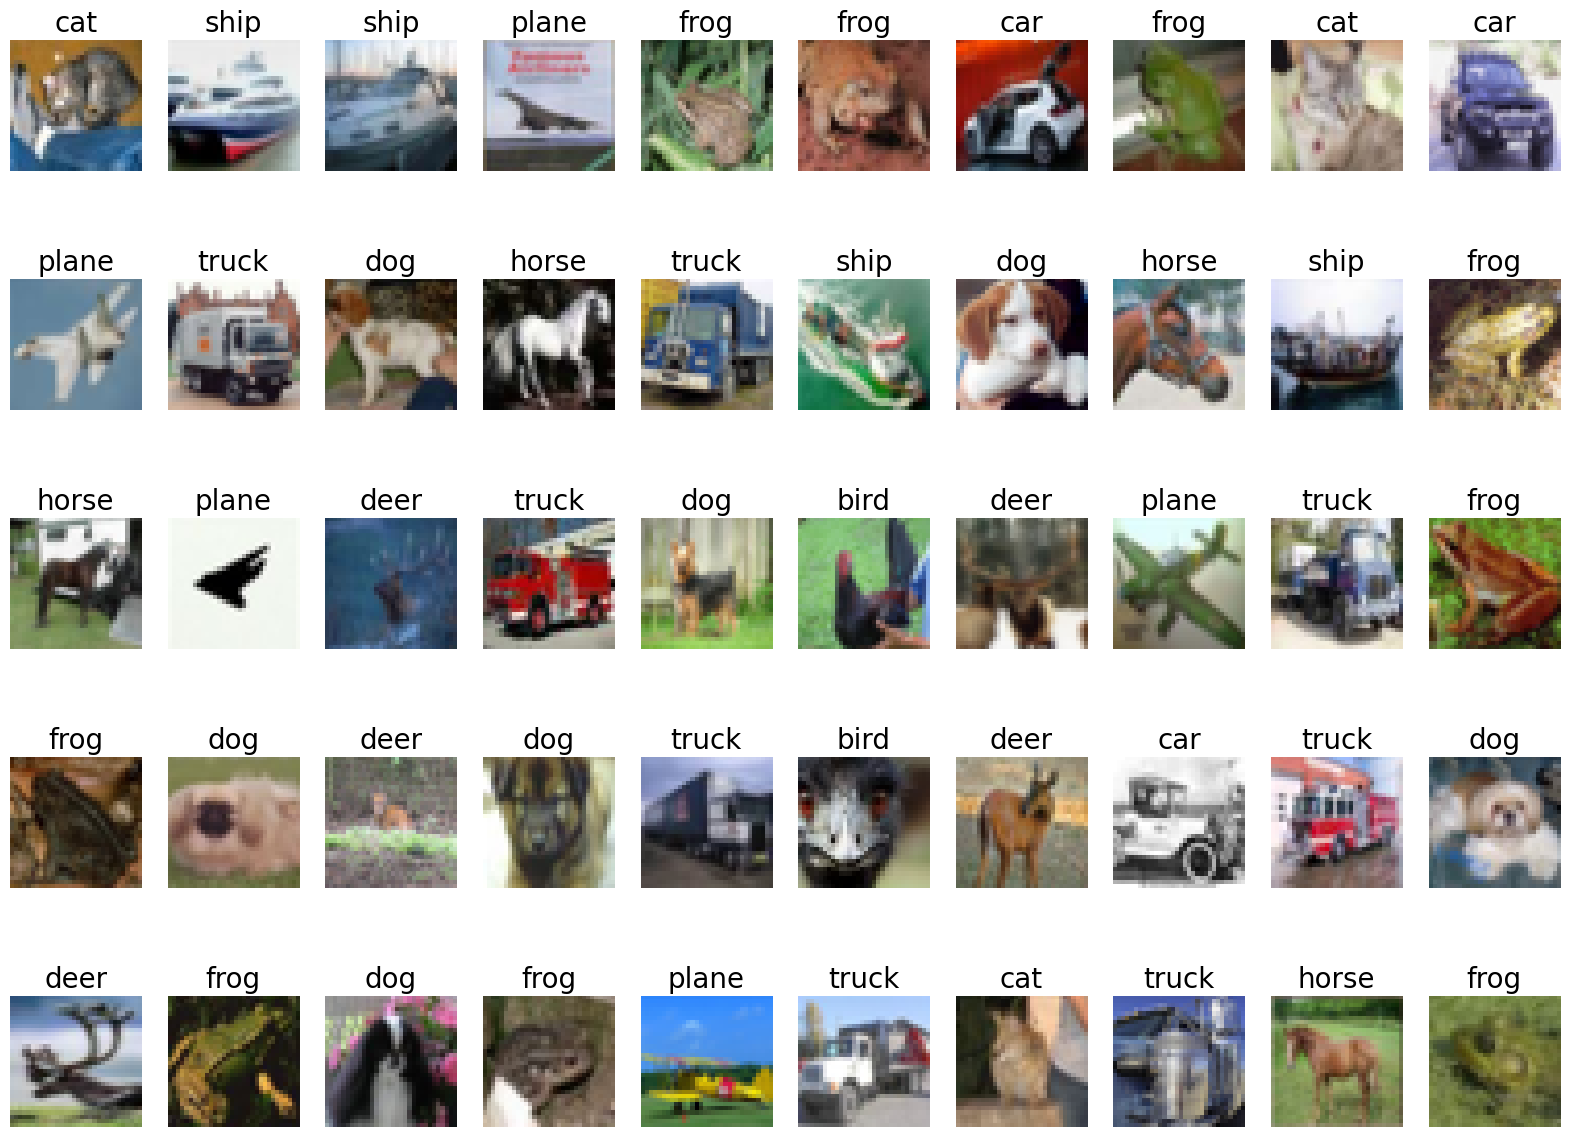

In [10]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
show_images_labels(test_loader2, classes, None, None)

In [11]:
n_input = image1.view(-1).shape[0]

n_output = len(set(list(labels1.data.numpy())))

n_hidden = 128

print(f'n_input: {n_input} n_hidden: {n_hidden} n_output {n_output}')

n_input: 3072 n_hidden: 128 n_output 10


In [12]:
class CNN_v2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1, 1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1, 1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1, 1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1, 1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1, 1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1, 1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2, 2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
        )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [13]:
torch_seed()

lr = 0.01
net = CNN_v2(n_output).to('cuda:0')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
history = np.zeros((0, 5))

In [15]:
num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader2, "cuda:0", history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.02303 acc: 0.10000 val_loss: 0.02303, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.02303 acc: 0.10000 val_loss: 0.02303, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.02302 acc: 0.10000 val_loss: 0.02302, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.02302 acc: 0.11204 val_loss: 0.02302, val_acc: 0.10120


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.02302 acc: 0.11870 val_loss: 0.02302, val_acc: 0.18410


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.02301 acc: 0.15652 val_loss: 0.02300, val_acc: 0.21230


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.02298 acc: 0.19758 val_loss: 0.02294, val_acc: 0.20140


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.02246 acc: 0.20726 val_loss: 0.02096, val_acc: 0.24430


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.02016 acc: 0.26126 val_loss: 0.01943, val_acc: 0.29630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.01908 acc: 0.31152 val_loss: 0.01841, val_acc: 0.33880


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.01792 acc: 0.35332 val_loss: 0.01741, val_acc: 0.35820


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.01700 acc: 0.38176 val_loss: 0.01655, val_acc: 0.39370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.01632 acc: 0.40618 val_loss: 0.01592, val_acc: 0.42050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.01575 acc: 0.42418 val_loss: 0.01552, val_acc: 0.43250


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.01525 acc: 0.43790 val_loss: 0.01491, val_acc: 0.45280


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.01486 acc: 0.45798 val_loss: 0.01607, val_acc: 0.42410


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.01444 acc: 0.47308 val_loss: 0.01384, val_acc: 0.49630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.01396 acc: 0.49512 val_loss: 0.01384, val_acc: 0.49840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.01354 acc: 0.51390 val_loss: 0.01417, val_acc: 0.50030


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.01305 acc: 0.53276 val_loss: 0.01308, val_acc: 0.52780


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.01260 acc: 0.55082 val_loss: 0.01246, val_acc: 0.55390


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.01211 acc: 0.56998 val_loss: 0.01239, val_acc: 0.55730


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.01174 acc: 0.58394 val_loss: 0.01160, val_acc: 0.58720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.01130 acc: 0.59764 val_loss: 0.01137, val_acc: 0.59300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.01094 acc: 0.61508 val_loss: 0.01166, val_acc: 0.59000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.01054 acc: 0.62986 val_loss: 0.01085, val_acc: 0.61820


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.01019 acc: 0.64266 val_loss: 0.01048, val_acc: 0.63110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.00979 acc: 0.65644 val_loss: 0.01038, val_acc: 0.63560


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.00946 acc: 0.67022 val_loss: 0.01049, val_acc: 0.63170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.00911 acc: 0.68296 val_loss: 0.00966, val_acc: 0.65830


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.00880 acc: 0.69314 val_loss: 0.00981, val_acc: 0.66120


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.00846 acc: 0.70528 val_loss: 0.00970, val_acc: 0.65890


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.00812 acc: 0.71730 val_loss: 0.00987, val_acc: 0.66160


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.00785 acc: 0.72568 val_loss: 0.00909, val_acc: 0.68550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.00754 acc: 0.73616 val_loss: 0.00924, val_acc: 0.68310


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.00725 acc: 0.74858 val_loss: 0.01005, val_acc: 0.65640


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.00693 acc: 0.75938 val_loss: 0.00936, val_acc: 0.68110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.00668 acc: 0.76734 val_loss: 0.00894, val_acc: 0.69190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.00636 acc: 0.77722 val_loss: 0.00926, val_acc: 0.68910


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.00605 acc: 0.78874 val_loss: 0.00925, val_acc: 0.69590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.00577 acc: 0.80006 val_loss: 0.00904, val_acc: 0.70590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.00545 acc: 0.81032 val_loss: 0.00935, val_acc: 0.69900


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.00517 acc: 0.81964 val_loss: 0.00970, val_acc: 0.69340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.00487 acc: 0.83072 val_loss: 0.00977, val_acc: 0.69460


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.00455 acc: 0.84232 val_loss: 0.00967, val_acc: 0.69660


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.00427 acc: 0.85042 val_loss: 0.01002, val_acc: 0.70050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.00394 acc: 0.86150 val_loss: 0.01023, val_acc: 0.70540


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.00364 acc: 0.87240 val_loss: 0.01062, val_acc: 0.69390


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.00339 acc: 0.88068 val_loss: 0.01131, val_acc: 0.68620


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.00311 acc: 0.88972 val_loss: 0.01141, val_acc: 0.70210


초기상태 : 손실 : 0.02303  정확도 : 0.10000
최종상태 : 손실 : 0.01141 정확도 : 0.70210


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.

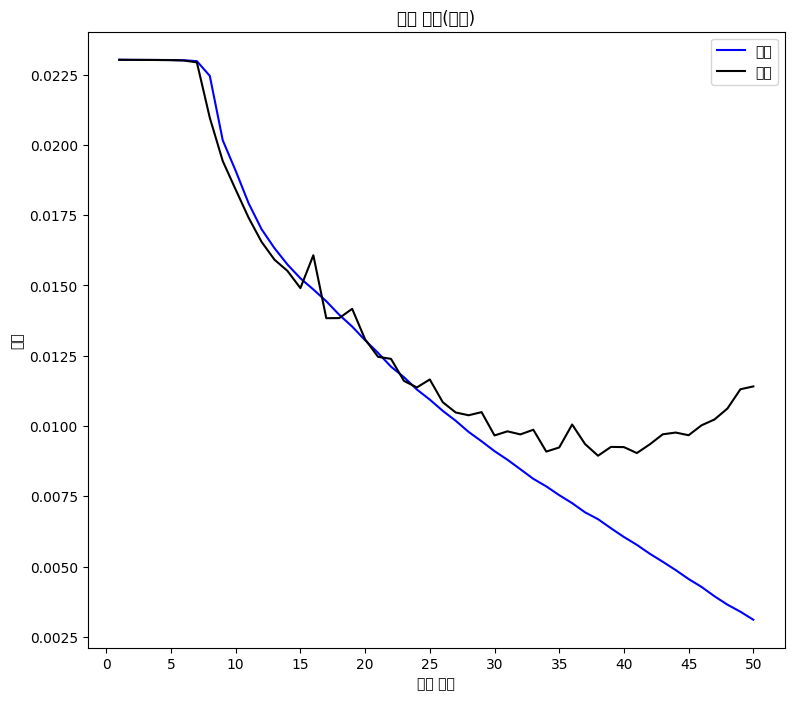

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


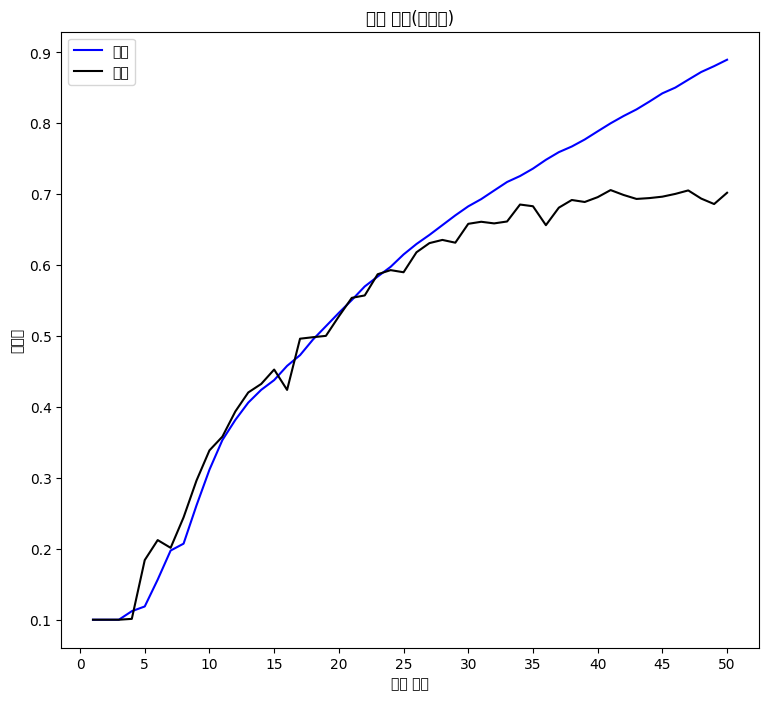

In [16]:
evaluate_history(history)

In [17]:
torch_seed()

lr = 0.01
net = CNN_v2(n_output).to("cuda:0")
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
history = np.zeros((0, 5))

In [18]:
torch_seed()

lr = 0.01
net = CNN_v2(n_output).to("cuda:0")
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

In [19]:
class CNN_v3(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1, 1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1, 1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1, 1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1, 1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1, 1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1, 1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2, 2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            self.dropout3,
        )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [22]:
class CNN_v4(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1, 1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1, 1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1, 1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1, 1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1, 1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1, 1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2, 2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(128)
        self.bn6 = nn.BatchNorm2d(128)

        self.features = nn.Sequential(
            self.conv1,
            self.bn1,
            self.relu,
            self.conv2,
            self.bn2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.bn3,
            self.relu,
            self.conv4,
            self.bn4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.bn5,
            self.relu,
            self.conv6,
            self.bn6,
            self.relu,
            self.maxpool,
            self.dropout3,
        )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [26]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False),
])

In [27]:
train_set2 = datasets.CIFAR10(
    root = data_root, train=True,
    download=True, transform=transform_train
)

batch_size = 100
train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


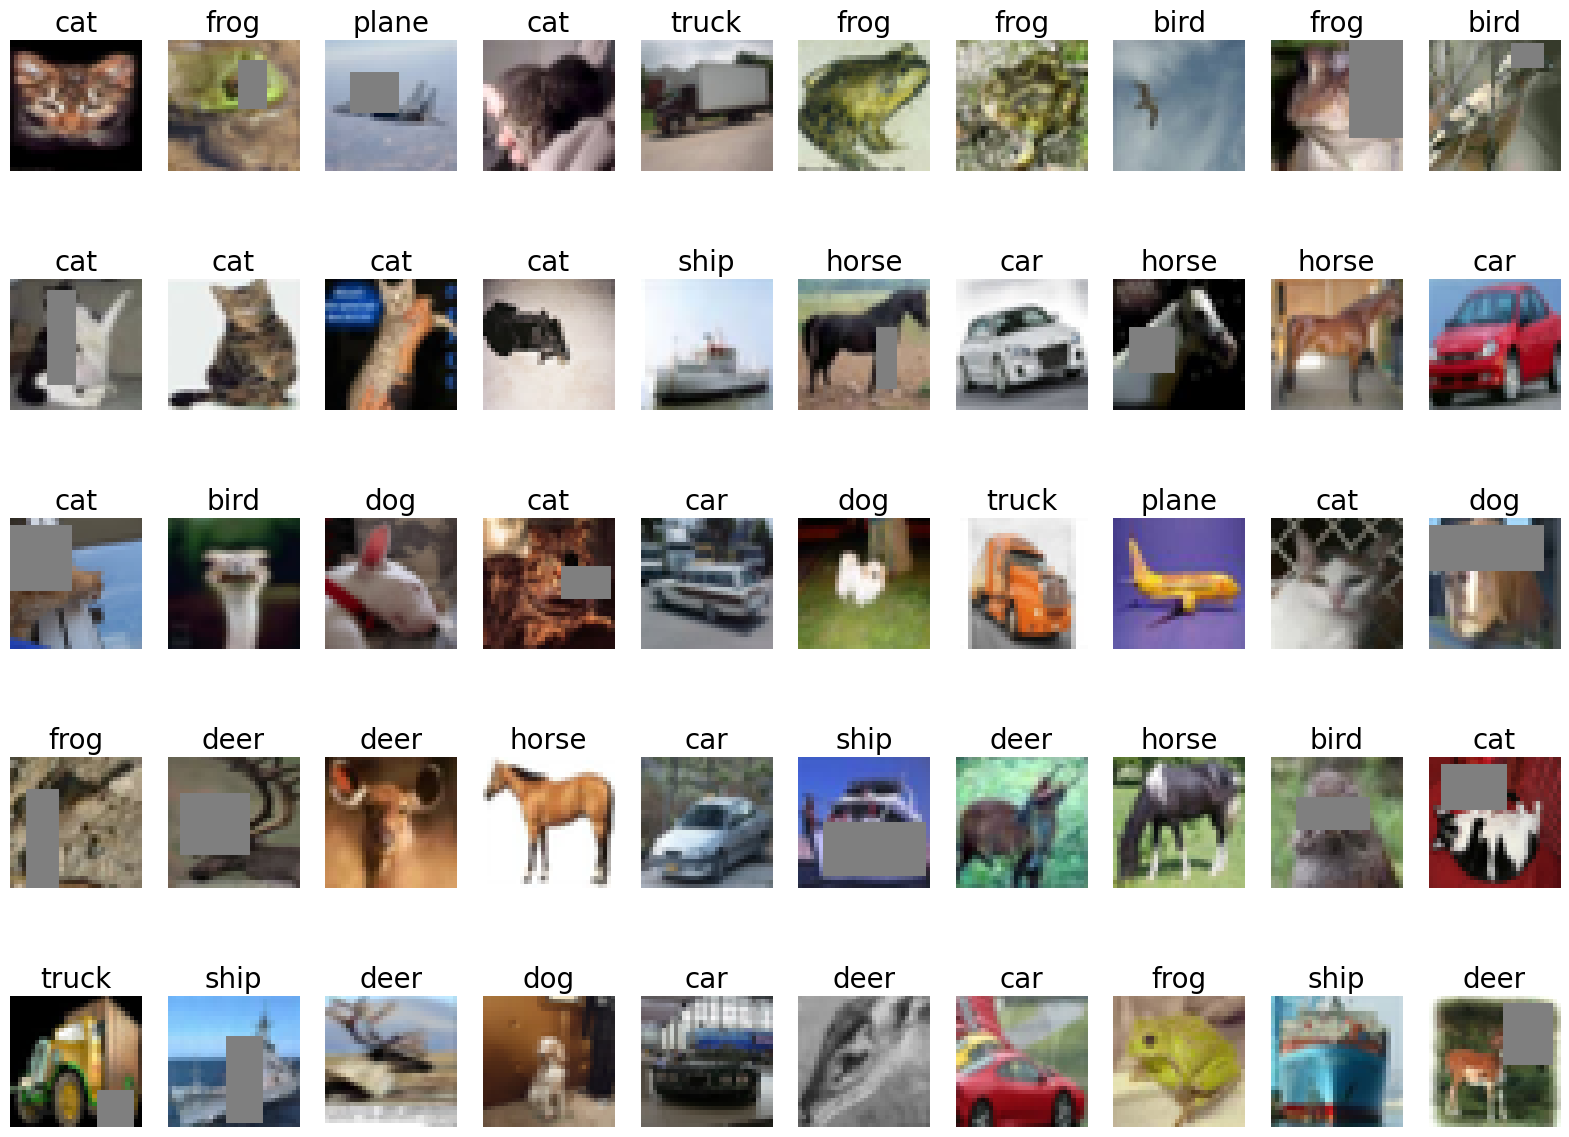

In [28]:
torch_seed()
show_images_labels(train_loader2, classes, None, None)

In [ ]:
torch_seed()

lr = 0.01
net = CNN_v4(n_output).to("cuda:0")
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

In [29]:
num_epochs = 100
history = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader2, "cuda:0", history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/100], loss: 0.01671 acc: 0.38130 val_loss: 0.01346, val_acc: 0.50570


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/100], loss: 0.01234 acc: 0.55270 val_loss: 0.01074, val_acc: 0.61530


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/100], loss: 0.01015 acc: 0.63548 val_loss: 0.00914, val_acc: 0.67280


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/100], loss: 0.00886 acc: 0.68840 val_loss: 0.00905, val_acc: 0.68110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/100], loss: 0.00798 acc: 0.71778 val_loss: 0.00718, val_acc: 0.74920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/100], loss: 0.00723 acc: 0.74520 val_loss: 0.00684, val_acc: 0.76550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/100], loss: 0.00674 acc: 0.76510 val_loss: 0.00677, val_acc: 0.77020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/100], loss: 0.00626 acc: 0.77966 val_loss: 0.00631, val_acc: 0.78850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/100], loss: 0.00590 acc: 0.79382 val_loss: 0.00586, val_acc: 0.79890


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/100], loss: 0.00559 acc: 0.80460 val_loss: 0.00589, val_acc: 0.80100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/100], loss: 0.00528 acc: 0.81494 val_loss: 0.00586, val_acc: 0.80560


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/100], loss: 0.00506 acc: 0.82310 val_loss: 0.00582, val_acc: 0.80380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/100], loss: 0.00486 acc: 0.82838 val_loss: 0.00616, val_acc: 0.80430


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/100], loss: 0.00465 acc: 0.83640 val_loss: 0.00575, val_acc: 0.80930


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/100], loss: 0.00442 acc: 0.84476 val_loss: 0.00557, val_acc: 0.81620


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/100], loss: 0.00427 acc: 0.85076 val_loss: 0.00594, val_acc: 0.80400


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/100], loss: 0.00409 acc: 0.85608 val_loss: 0.00559, val_acc: 0.81910


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/100], loss: 0.00405 acc: 0.85670 val_loss: 0.00587, val_acc: 0.81320


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/100], loss: 0.00392 acc: 0.86106 val_loss: 0.00596, val_acc: 0.81370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/100], loss: 0.00375 acc: 0.86876 val_loss: 0.00611, val_acc: 0.81590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/100], loss: 0.00365 acc: 0.87164 val_loss: 0.00602, val_acc: 0.81530


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/100], loss: 0.00356 acc: 0.87314 val_loss: 0.00611, val_acc: 0.81530


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/100], loss: 0.00347 acc: 0.87810 val_loss: 0.00582, val_acc: 0.82870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/100], loss: 0.00331 acc: 0.88260 val_loss: 0.00584, val_acc: 0.82700


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/100], loss: 0.00322 acc: 0.88718 val_loss: 0.00610, val_acc: 0.81990


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/100], loss: 0.00319 acc: 0.88768 val_loss: 0.00616, val_acc: 0.82160


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/100], loss: 0.00314 acc: 0.89012 val_loss: 0.00619, val_acc: 0.82210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/100], loss: 0.00312 acc: 0.88992 val_loss: 0.00609, val_acc: 0.82150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/100], loss: 0.00297 acc: 0.89628 val_loss: 0.00656, val_acc: 0.81560


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/100], loss: 0.00294 acc: 0.89712 val_loss: 0.00638, val_acc: 0.81640


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/100], loss: 0.00290 acc: 0.89792 val_loss: 0.00625, val_acc: 0.82000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/100], loss: 0.00285 acc: 0.90118 val_loss: 0.00653, val_acc: 0.81830


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/100], loss: 0.00284 acc: 0.90172 val_loss: 0.00635, val_acc: 0.81720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/100], loss: 0.00276 acc: 0.90276 val_loss: 0.00642, val_acc: 0.82230


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/100], loss: 0.00270 acc: 0.90548 val_loss: 0.00636, val_acc: 0.81380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/100], loss: 0.00265 acc: 0.90624 val_loss: 0.00640, val_acc: 0.82210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/100], loss: 0.00262 acc: 0.90772 val_loss: 0.00673, val_acc: 0.82240


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/100], loss: 0.00260 acc: 0.91006 val_loss: 0.00633, val_acc: 0.82340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/100], loss: 0.00256 acc: 0.91110 val_loss: 0.00632, val_acc: 0.83020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/100], loss: 0.00247 acc: 0.91240 val_loss: 0.00682, val_acc: 0.81150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/100], loss: 0.00246 acc: 0.91406 val_loss: 0.00653, val_acc: 0.81780


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/100], loss: 0.00246 acc: 0.91464 val_loss: 0.00677, val_acc: 0.81920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/100], loss: 0.00241 acc: 0.91454 val_loss: 0.00681, val_acc: 0.82330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/100], loss: 0.00236 acc: 0.91792 val_loss: 0.00645, val_acc: 0.82740


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/100], loss: 0.00243 acc: 0.91536 val_loss: 0.00712, val_acc: 0.81300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/100], loss: 0.00235 acc: 0.91730 val_loss: 0.00698, val_acc: 0.81950


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/100], loss: 0.00228 acc: 0.92146 val_loss: 0.00715, val_acc: 0.81500


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/100], loss: 0.00230 acc: 0.91940 val_loss: 0.00729, val_acc: 0.82030


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/100], loss: 0.00226 acc: 0.92146 val_loss: 0.00671, val_acc: 0.82900


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/100], loss: 0.00221 acc: 0.92238 val_loss: 0.00708, val_acc: 0.81960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [51/100], loss: 0.00223 acc: 0.92358 val_loss: 0.00720, val_acc: 0.82010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [52/100], loss: 0.00226 acc: 0.92192 val_loss: 0.00725, val_acc: 0.82190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [53/100], loss: 0.00217 acc: 0.92570 val_loss: 0.00778, val_acc: 0.81900


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [54/100], loss: 0.00217 acc: 0.92524 val_loss: 0.00724, val_acc: 0.81720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [55/100], loss: 0.00213 acc: 0.92604 val_loss: 0.00702, val_acc: 0.82440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [56/100], loss: 0.00213 acc: 0.92582 val_loss: 0.00719, val_acc: 0.81950


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [57/100], loss: 0.00212 acc: 0.92650 val_loss: 0.00703, val_acc: 0.82720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [58/100], loss: 0.00212 acc: 0.92804 val_loss: 0.00737, val_acc: 0.82390


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [59/100], loss: 0.00210 acc: 0.92594 val_loss: 0.00759, val_acc: 0.82250


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [60/100], loss: 0.00216 acc: 0.92576 val_loss: 0.00738, val_acc: 0.82610


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [61/100], loss: 0.00208 acc: 0.92714 val_loss: 0.00719, val_acc: 0.82620


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [62/100], loss: 0.00204 acc: 0.92970 val_loss: 0.00739, val_acc: 0.82630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [63/100], loss: 0.00207 acc: 0.92764 val_loss: 0.00726, val_acc: 0.82500


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [64/100], loss: 0.00198 acc: 0.93220 val_loss: 0.00753, val_acc: 0.82980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [65/100], loss: 0.00206 acc: 0.92918 val_loss: 0.00704, val_acc: 0.82550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [66/100], loss: 0.00199 acc: 0.93218 val_loss: 0.00746, val_acc: 0.82130


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [67/100], loss: 0.00198 acc: 0.93214 val_loss: 0.00772, val_acc: 0.82300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [68/100], loss: 0.00198 acc: 0.93144 val_loss: 0.00731, val_acc: 0.83070


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [69/100], loss: 0.00202 acc: 0.93056 val_loss: 0.00764, val_acc: 0.81840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [70/100], loss: 0.00202 acc: 0.93084 val_loss: 0.00728, val_acc: 0.81660


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [71/100], loss: 0.00192 acc: 0.93354 val_loss: 0.00785, val_acc: 0.81840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [72/100], loss: 0.00197 acc: 0.93266 val_loss: 0.00721, val_acc: 0.82650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [73/100], loss: 0.00193 acc: 0.93388 val_loss: 0.00759, val_acc: 0.82080


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [74/100], loss: 0.00187 acc: 0.93504 val_loss: 0.00778, val_acc: 0.82110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [75/100], loss: 0.00191 acc: 0.93316 val_loss: 0.00770, val_acc: 0.82310


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [76/100], loss: 0.00200 acc: 0.93084 val_loss: 0.00777, val_acc: 0.81770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [77/100], loss: 0.00193 acc: 0.93464 val_loss: 0.00746, val_acc: 0.81940


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [78/100], loss: 0.00189 acc: 0.93528 val_loss: 0.00803, val_acc: 0.82000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [79/100], loss: 0.00187 acc: 0.93506 val_loss: 0.00776, val_acc: 0.81910


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [80/100], loss: 0.00191 acc: 0.93390 val_loss: 0.00750, val_acc: 0.82680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [81/100], loss: 0.00189 acc: 0.93506 val_loss: 0.00764, val_acc: 0.82460


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [82/100], loss: 0.00188 acc: 0.93630 val_loss: 0.00747, val_acc: 0.82330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [83/100], loss: 0.00185 acc: 0.93562 val_loss: 0.00737, val_acc: 0.82910


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [84/100], loss: 0.00188 acc: 0.93460 val_loss: 0.00796, val_acc: 0.82710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [85/100], loss: 0.00180 acc: 0.93978 val_loss: 0.00755, val_acc: 0.83030


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [86/100], loss: 0.00183 acc: 0.93746 val_loss: 0.00768, val_acc: 0.82920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [87/100], loss: 0.00185 acc: 0.93842 val_loss: 0.00736, val_acc: 0.82730


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [88/100], loss: 0.00186 acc: 0.93794 val_loss: 0.00757, val_acc: 0.82680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [89/100], loss: 0.00185 acc: 0.93560 val_loss: 0.00779, val_acc: 0.82870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [90/100], loss: 0.00176 acc: 0.93898 val_loss: 0.00805, val_acc: 0.81880


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [91/100], loss: 0.00185 acc: 0.93662 val_loss: 0.00785, val_acc: 0.82060


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [92/100], loss: 0.00178 acc: 0.93964 val_loss: 0.00766, val_acc: 0.83080


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [93/100], loss: 0.00175 acc: 0.94074 val_loss: 0.00808, val_acc: 0.82480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [94/100], loss: 0.00175 acc: 0.94024 val_loss: 0.00785, val_acc: 0.82240


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [95/100], loss: 0.00180 acc: 0.93934 val_loss: 0.00765, val_acc: 0.82520


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [96/100], loss: 0.00178 acc: 0.94030 val_loss: 0.00806, val_acc: 0.82990


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [97/100], loss: 0.00183 acc: 0.93818 val_loss: 0.00796, val_acc: 0.82840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [98/100], loss: 0.00178 acc: 0.93976 val_loss: 0.00803, val_acc: 0.82440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [99/100], loss: 0.00177 acc: 0.94042 val_loss: 0.00801, val_acc: 0.81570


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [100/100], loss: 0.00181 acc: 0.93938 val_loss: 0.00834, val_acc: 0.82130


초기상태 : 손실 : 0.01346  정확도 : 0.50570
최종상태 : 손실 : 0.00834 정확도 : 0.82130


c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.

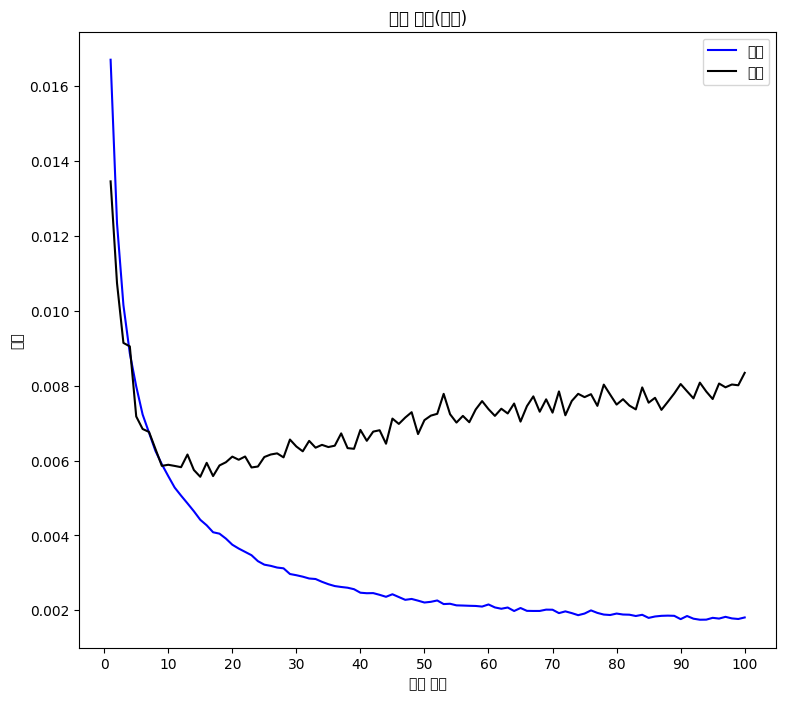

c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\.conda\envs\ML_lecture\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


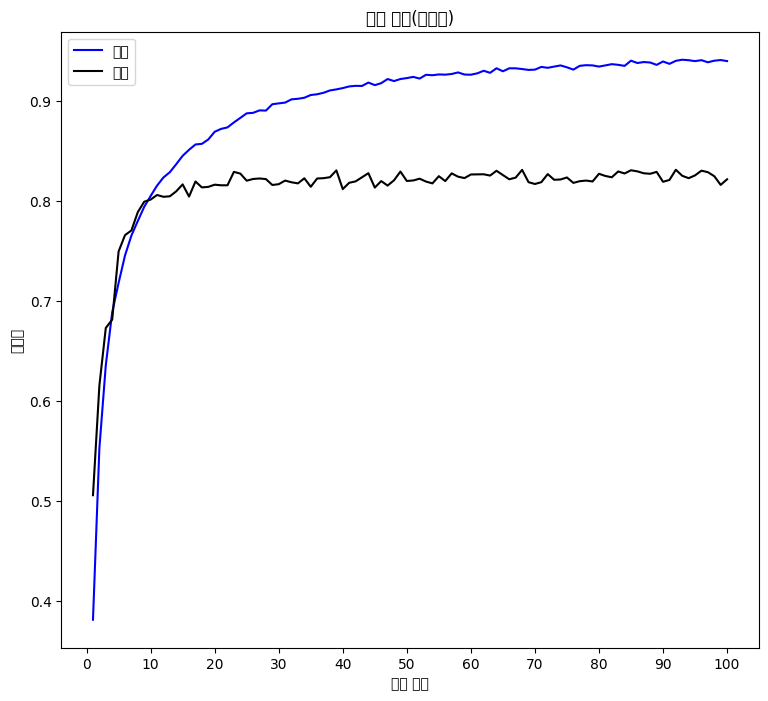

In [30]:
evaluate_history(history)

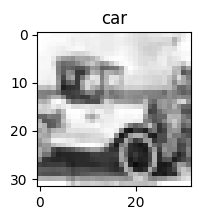

In [31]:
for images, labels, in test_loader2:
    break
image = images[37]
label = labels[37]

plt.figure(figsize=(2, 2))
w = image.numpy().copy()
w2 = np.transpose(w, (1, 2, 0))
w3 = (w2 + 1) / 2
plt.title(classes[label])
plt.imshow(w3)
plt.show()

In [32]:
image = image.view(1, 3, 32, 32)
image = image.to("cuda:0")
output = net(image)

probs = torch.softmax(output, dim=1)
probs_np = probs.data.to('cpu').numpy()[0]
values = np.frompyfunc(lambda x: f'{x:.04f}', 1, 1)(probs_np)
names = np.array(classes)
tbl = np.array([names, values]).T
print(tbl)

[['plane' '0.0000']
 ['car' '0.0384']
 ['bird' '0.0000']
 ['cat' '0.0000']
 ['deer' '0.0000']
 ['dog' '0.0000']
 ['frog' '0.0000']
 ['horse' '0.0000']
 ['ship' '0.0000']
 ['truck' '0.9616']]
